# Some stats
## Mise en place
Necessary packages :
```
pandas
numpy
matplotlib
seaborn
```

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import difflib

%matplotlib widget

In [2]:
data = pd.read_csv("data/books.csv")
data.columns

Index(['bookId', 'title', 'series', 'author', 'rating', 'description',
       'language', 'isbn', 'genres', 'characters', 'bookFormat', 'edition',
       'pages', 'publisher', 'publishDate', 'firstPublishDate', 'awards',
       'numRatings', 'ratingsByStars', 'likedPercent', 'setting', 'coverImg',
       'bbeScore', 'bbeVotes', 'price'],
      dtype='object')

In [3]:
data

,bookId,title,series,author,rating,description,language,isbn,genres,characters,...,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price
0,2767052-the-hunger-games,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,9780439023481,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",...,NaN,['Locus Award Nominee for Best Young Adult Boo...,6376780,"['3444695', '1921313', '745221', '171994', '93...",96.0,"['District 12, Panem', 'Capitol, Panem', 'Pane...",https://i.gr-assets.com/images/S/compressed.ph...,2993816,30516,5.09
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,9780439358071,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",...,06/21/03,['Bram Stoker Award for Works for Young Reader...,2507623,"['1593642', '637516', '222366', '39573', '14526']",98.0,['Hogwarts School of Witchcraft and Wizardry (...,https://i.gr-assets.com/images/S/compressed.ph...,2632233,26923,7.38
2,2657.To_Kill_a_Mockingbird,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,9999999999999,"['Classics', 'Fiction', 'Historical Fiction', ...","['Scout Finch', 'Atticus Finch', 'Jem Finch', ...",...,07/11/60,"['Pulitzer Prize for Fiction (1961)', 'Audie A...",4501075,"['2363896', '1333153', '573280', '149952', '80...",95.0,"['Maycomb, Alabama (United States)']",https://i.gr-assets.com/images/S/compressed.ph...,2269402,23328,NaN
3,1885.Pride_and_Prejudice,Pride and Prejudice,NaN,"Jane Austen, Anna Quindlen (Introduction)",4.26,Alternate cover edition of ISBN 9780679783268S...,English,9999999999999,"['Classics', 'Fiction', 'Romance', 'Historical...","['Mr. Bennet', 'Mrs. Bennet', 'Jane Bennet', '...",...,01/28/13,[],2998241,"['1617567', '816659', '373311', '113934', '767...",94.0,"['United Kingdom', 'Derbyshire, England (Unite...",https://i.gr-assets.com/images/S/compressed.ph...,1983116,20452,NaN
4,41865.Twilight,Twilight,The Twilight Saga #1,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,9780316015844,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",...,10/05/05,"['Georgia Peach Book Award (2007)', 'Buxtehude...",4964519,"['1751460', '1113682', '1008686', '542017', '5...",78.0,"['Forks, Washington (United States)', 'Phoenix...",https://i.gr-assets.com/images/S/compressed.ph...,1459448,14874,2.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52473,11492014-fractured,Fractured,Fateful #2,Cheri Schmidt (Goodreads Author),4.00,The Fateful Trilogy continues with Fractured. ...,English,2940012616562,"['Vampires', 'Paranormal', 'Young Adult', 'Rom...",[],...,NaN,[],871,"['311', '310', '197', '42', '11']",94.0,[],https://i.gr-assets.com/images/S/compressed.ph...,0,1,NaN
52474,11836711-anasazi,Anasazi,Sense of Truth #2,Emma Michaels,4.19,"'Anasazi', sequel to 'The Thirteenth Chime' by...",English,9999999999999,"['Mystery', 'Young Adult']",[],...,August 3rd 2011,[],37,"['16', '14', '5', '2', '0']",95.0,[],https://i.gr-assets.com/images/S/compressed.ph...,0,1,NaN
52475,10815662-marked,Marked,Soul Guardians #1,Kim Richardson (Goodreads Author),3.70,--READERS FAVORITE AWARDS WINNER 2011--Sixteen...,English,9781461017097,"['Fantasy', 'Young Adult', 'Paranormal', 'Ange...",[],...,March 15th 2011,"[""Readers' Favorite Book Award (2011)""]",6674,"['2109', '1868', '1660', '647', '390']",84.0,[],https://i.gr-assets.com/images/S/compressed.ph...,0,1,7.37
52476,11330278-wayward-son,Wayward Son,NaN,"Tom Pollack (Goodreads Author), John Loftus (G...",3.85,A POWERFUL TREMOR UNEARTHS AN ANCIENT SECRETBu...,English

## Publishers
We know that the data is not very clean. Publishers for example have some quasi-duplicates e.g. `集英社` and `集英社 / Shūeisha` which both refer to the same Japanese publishing company.

In [4]:
pubs = data["publisher"].drop_duplicates().sort_values()

def n_shifted(series, n):
    ret = [series]
    for i in range(n):
        ret.append(ret[-1].shift())
    return ret

def make_series(how_many_neighbours):
    return pd.concat(n_shifted(pubs, how_many_neighbours), axis=1).dropna().set_axis([0] + [x for x in range(1, how_many_neighbours + 1)], axis=1)

shift_matrix = make_series(15)

In [5]:
def look_at_n_neighbours(n):
    return shift_matrix[list(range(0, n + 1))]

def measure_similarity(row):
    ratios = [ difflib.SequenceMatcher(a=row[0], b=row[i]).ratio() for i in range(1, len(row)) ]
    return sum(ratios)/len(ratios)

similarities = pd.DataFrame(
    {
        n: look_at_n_neighbours(n).apply(measure_similarity, axis=1)
        for n
        in range(1, 15)
    }
)

In [6]:
readable_similarities = similarities.set_axis([f"avg. similarity to next {x} samples" for x in range(1, len(similarities.columns)+1)], axis=1)
readable_similarities

,avg. similarity to next 1 samples,avg. similarity to next 2 samples,avg. similarity to next 3 samples,avg. similarity to next 4 samples,avg. similarity to next 5 samples,avg. similarity to next 6 samples,avg. similarity to next 7 samples,avg. similarity to next 8 samples,avg. similarity to next 9 samples,avg. similarity to next 10 samples,avg. similarity to next 11 samples,avg. similarity to next 12 samples,avg. similarity to next 13 samples,avg. similarity to next 14 samples
2798,0.046512,0.064922,0.072267,0.079200,0.087603,0.128558,0.123179,0.120940,0.115165,0.136982,0.154832,0.141929,0.131012,0.121654
25909,0.518519,0.366402,0.316340,0.292811,0.270612,0.297974,0.278263,0.286338,0.289245,0.303177,0.290161,0.279314,0.257829,0.259820
28540,0.242424,0.171212,0.154958,0.149552,0.188607,0.195634,0.196990,0.186255,0.205243,0.216719,0.222991,0.213668,0.205779,0.191080
18823,0.307692,0.327759,0.238708,0.235483,0.216293,0.204054,0.189555,0.199515,0.184515,0.200210,0.205932,0.216549,0.204854,0.194830
18943,0.133333,0.184314,0.206209,0.291020,0.242816,0.218220,0.201331,0.190871,0.184478,0.210474,0.200910,0.194584,0.185533,0.204027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4927,0.352941,0.176471,0.117647,0.117647,0.094118,0.098039,0.084034,0.088235,0.078431,0.081115,0.091922,0.084262,0.077780,0.072225
29127,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.077922,0.068182,0.060606,0.054545,0.070977,0.065062,0.060058,0.055768
21639,0.000000,0.058824,0.150327,0.112745,0.090196,0.130719,0.112045,0.139706,0.124183,0.145098,0.131907,0.141748,0.130845,0.121499
36584,0.352941,0.176471,0.284314,0.242647,0.194118,0.161765,0.155462,0.136029,0.133987,0.120588,0.120321,0.110294,0.109907,0.121104


Let's try a similarity heatmap, it'll be fun though unreadable.

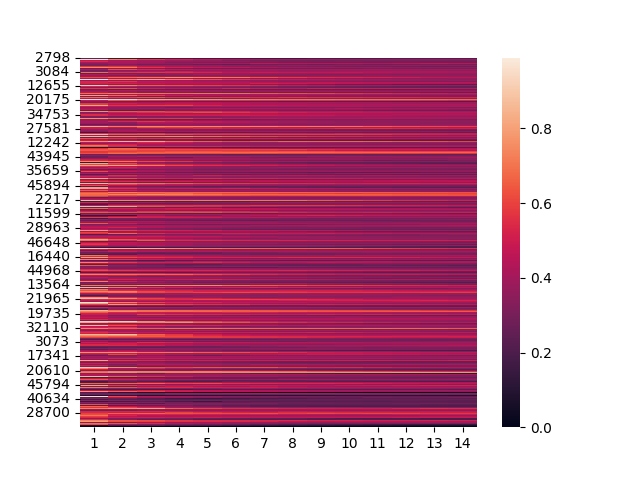

In [26]:
# Fun but unreadable graph

plt.close()
sns.heatmap(similarities)
plt.show()

There are some visible patches of high-similarity data in the heatmap. It is also visible that generally, similarities for a given index tend to decrease with a growing number of samples taken.

In [27]:
# Here we try to avoid drowning quasi-duplicates in the averages, by taking the max of all similarities for each publisher.

max_similarity = similarities.max(axis=1)
max_similarity

2798     0.154832
25909    0.518519
28540    0.242424
18823    0.327759
18943    0.291020
           ...   
4927     0.352941
29127    0.090909
21639    0.150327
36584    0.352941
41948    0.322581
Length: 11095, dtype: float64

In [28]:
cm = matplotlib.cm.get_cmap("viridis", 8)
colors = [cm(x) for x in np.linspace(0, 1, len(similarities.columns))]

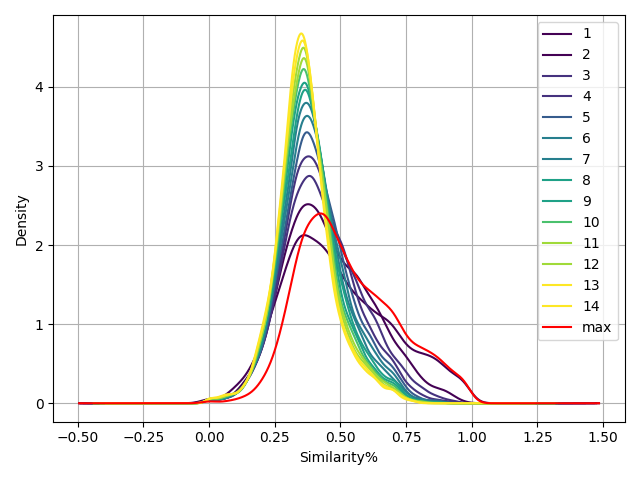

In [29]:
plt.close()
ax = similarities.plot.density(color=colors)
ax2 = max_similarity.plot.density(color="red", label="max", grid=True)
plt.xlabel("Similarity%")
plt.legend()
plt.tight_layout()
plt.show()

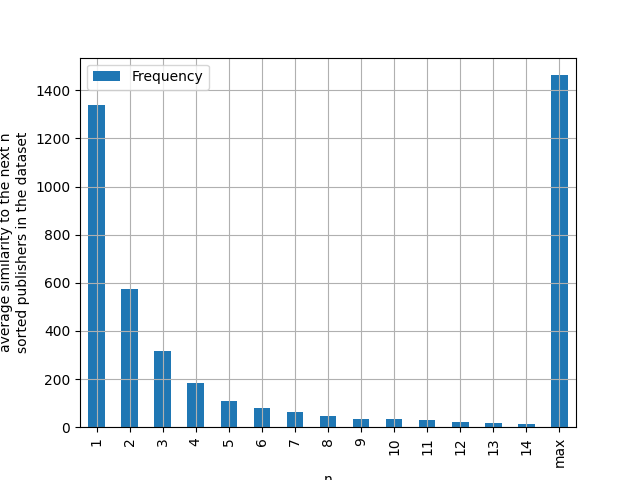

In [30]:
temp = similarities.set_axis([f"{x}" for x in range(1, len(similarities.columns) + 1)], axis=1)
temp["max"] = max_similarity

plt.close()
sums = pd.DataFrame((temp > 0.75).astype(int).sum(), columns=["Frequency"])
sums.plot.bar(grid=True)
plt.ylabel("Frequency of publishers with more than 75%\naverage similarity to the next n\nsorted publishers in the dataset")
plt.xlabel("n")
plt.show()

To show that the `publisher` column contains quasi-duplicates, we apply a custom algorithm (scientific value not guaranteed).

1. We sort the column by value so that quasi-duplicates sharing a prefix will land close together. 
2. Then, for each publisher $i$, take the next $j = 1..n$ publishers in the sorted list. (With $n$ varying between 1 and $N$)
3. For each publisher $j$, compute the Gestalt Similarity Measure between $i$ and $j$.
4. Average all measured similarities. This gives the average similarity for the next $n$ publishers, for the publisher $i$.

So, for each publisher $i$, you get a sequence of similarities $(S_{in}) = S_{i1} ... S_{iN}$ (one for each value of $n$). Due to how averaging works, if, say a size-4 cluster of similar publishers appears, and $i$ is its first element, the similarity for $n = 4 - 1 = 3$ should be the largest element of $(S_{in})$. 

We want to keep many values of $n$ for every $i$ so that we can find many differently-sized clusters of similar publishers.
We also keep around the maximum similarity $\max (S_{in})$ for every publisher $i$.

---

The first graph shows the density of the average similarity for different values of $n$ from 1 to $N=14$, and also the density of $\max (S_{in})$.

The second one shows the frequency of publishers which are very (>75% similarity ratio - 60% is a rule of thumb for this kind of similarity measure, cf [the source](https://github.com/python/cpython/blob/3faa9f78d4b9a8c0fd4657b434bdb08ae1f28800/Lib/difflib.py#L78), but we found 75% was empirically closer to our needs in this context) similar to their $n$ neighbours (for every value of $n$). The graph also shows the frequency of publishers $i$ whose $\max (S_{in})$ is >75%. 

We see that the frequency of size-2 clusters of very similar publishers is quite high: 1300 out of 11000 unique `publisher` values. The trend diminishes (as expected) for higher cluster sizes. This may be a side-effect of sorting the column, assuming that true publisher names are not very diverse. Or it may indeed reflect that many quasi-duplicates are found in the dataset, assuming that true publisher names are diverse. This may be a Bayesian problem, in the end.

---

Since that whole analysis may not be very convincing (but we do not want to throw it away) here are some examples of size-at-least-3 quasi-duplicates clusters.

It can be seen that our similarities algorithm give a good enough heuristic to find quasi-duplicates, while there are also just very similar but different publisher names, such as `University Press of Florida, University Press of Colorado, University Press of America` at index 23636.

We'll refrain from losing space with such an analysis in the next parts.

In [33]:
shift_matrix.loc[similarities[5] > 0.75].sample(40)[[0, 1, 2, 3, 4, 5]]

,0,1,2,3,4,5
454,Barnes Noble Classics,Barnes Noble,Barnes & Noble Inc,Barnes & Noble Classics,Barnes & Noble Books,Barnes & Noble
22311,"Penguin Group USA, Inc",Penguin Group USA Inc.,Penguin Group USA Inc,Penguin Group USA,Penguin Group NAL Trade,Penguin Group Inc.
18703,University of Michigan Press,University of Michigan Library,University of Lodz,University of Illinois Press,University of Hawaii Press,University of Georgia Press
26356,Editorial Hidra,Editorial Hansben,Editorial Garuda,Editorial Forja,Editorial Estampa,Editorial Era
16932,Harper Collins Publishers Ltd,Harper Collins Publishers India,Harper Collins Publishers,Harper Collins Publisher,Harper Collins Promotion,Harper Collins Ltd
17990,University of Nevada Press,University of Nebraska Press Bison,University of Nebraska Press,University of Nebraska Bison,University of Minnesota Press,University of Michigan Press
24515,Self-pulblished,Self-published,Self-Realization Fellowship Publishers,Self-Published,Self published,Self Published on ff.net
42972,دار الكتب العلميه,دار الكتب العلمية,دار الكتاب اللبناني,دار الكتاب العربي,دار الكتاب العربى,دار الكاتب العربي للطباعة والنشر
30675,Penguin Books UK,Penguin Books Ltd. (London),Penguin Books Ltd.,Penguin Books Ltd,Penguin Books Limited,Penguin Books India
48656,Scholastic Ltd,Scholastic India,Scholastic Incorporated,Scholastic Inc.,Scholastic Inc,Scholastic Hippo


Let's see the publishers' distribution, anyway. Keeping in mind that the quasi-duplicates will make us underestimate counts.

There are 11111 publishers.


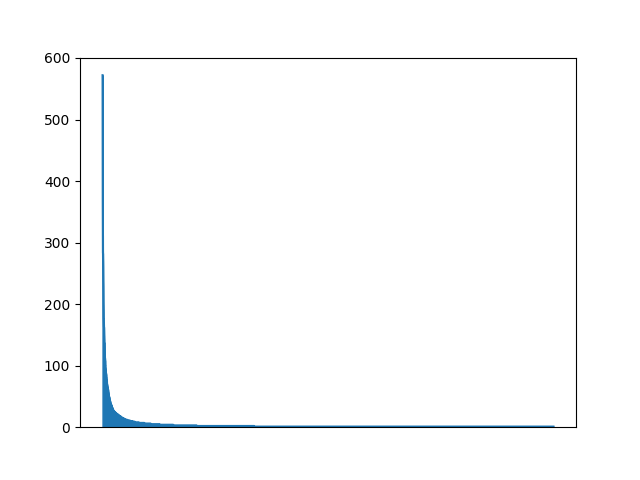

Vintage                                        572
HarperCollins                                  563
Penguin Books                                  430
Ballantine Books                               399
Bantam                                         369
Createspace Independent Publishing Platform    367
Pocket Books                                   314
Avon                                           311
Berkley                                        287
Del Rey                                        284
Tor Books                                      283
Penguin Classics                               282
HarperTeen                                     274
Simon Pulse                                    270
Grand Central Publishing                       263
St. Martin's Press                             238
Little, Brown Books for Young Readers          234
Harper Perennial                               229
Signet                                         206
Penguin                        

In [34]:
pubs2 = data["publisher"].astype("category")
print(f"There are {len(pubs2.drop_duplicates())} publishers.")

plt.close()
ax = pubs2.value_counts().plot.area()
ax.get_xaxis().set_visible(False)
plt.show()

pubs2.value_counts().sort_values(ascending=False).head(30)

Here we see a rather sharp decrease in frequency through the first 30 publishers, by about 5x.

## Setting
Another interesting column is `setting`. It contains a list of places where the book's action happens. Is the distribution of all places heavy-tailed?

In [35]:
import ast

def to_list(string):
     return ast.literal_eval(string)

settings = data["setting"].map(to_list)  # the original column contains strings. we want lists.
settings = settings.explode().dropna().astype("category")
settings

0                                       District 12, Panem
0                                           Capitol, Panem
0                                    Panem (United States)
1        Hogwarts School of Witchcraft and Wizardry (Un...
1                                          London, England
                               ...                        
52440                                          Afghanistan
52441              Los Angeles, California (United States)
52444                                         South Africa
52470                           West Texas (United States)
52472                  Port Fare, New York (United States)
Name: setting, Length: 17365, dtype: category
Categories (4124, object): ['  (Pakistan)', ''glantine', '667 Dark Avenue', 'Aarau, Aargau (Switzerland)', ..., 'سوريا (Syrian Arab Republic)', 'مكتبة رحاب- ساحة بورسعيد - الجزائر - الجزائر ..., '內蒙古 (China)', '松本 (Japan)']

There are 4124 settings.


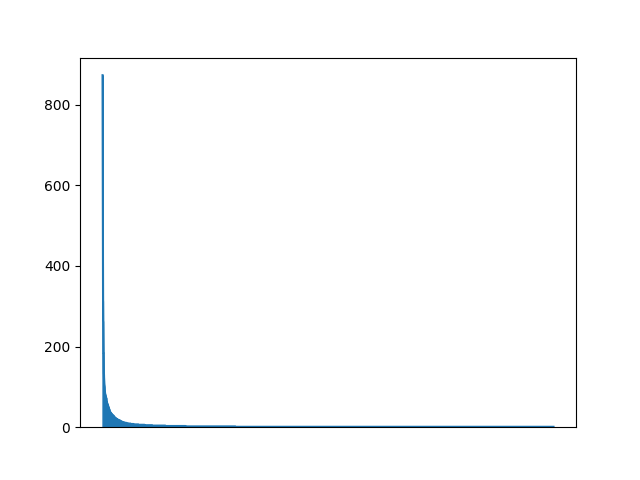

United States of America                     873
London, England                              723
New York City, New York (United States)      544
England                                      316
United Kingdom                               312
Paris (France)                               264
New York State (United States)               262
California (United States)                   214
Los Angeles, California (United States)      184
Chicago, Illinois (United States)            184
France                                       153
San Francisco, California (United States)    134
Boston, Massachusetts (United States)        131
Egypt                                        119
New Orleans, Louisiana (United States)       110
Seattle, Washington (United States)          106
Italy                                        104
Japan                                        102
Washington, D.C. (United States)              99
Rome (Italy)                                  90
Florida (United Stat

In [36]:
print(f"There are {len(settings.drop_duplicates())} settings.")

plt.close()
ax = settings.value_counts().plot.area()
ax.get_xaxis().set_visible(False)
plt.show()

settings.value_counts().sort_values(ascending=False).head(30)

As we can see, the settings are indeed very heavy-tailed. Even through only the first 30 most frequent out of 4124, there is a fall in frequency of over 10x!

## Genre
Let's see if genres are so sparse too.

In [39]:
import ast

def to_list(string):
     return ast.literal_eval(string)

genres = data["genres"].map(to_list)  # the original column contains strings. we want lists.
genres = genres.explode().dropna().astype("category")
genres

0            Young Adult
0                Fiction
0               Dystopia
0                Fantasy
0        Science Fiction
              ...       
52477                Lds
52477         Historical
52477            Romance
52477          Adventure
52477               Teen
Name: genres, Length: 407718, dtype: category
Categories (982, object): ['10th Century', '11th Century', '12th Century', '13th Century', ..., 'Zen', 'Zimbabwe', 'Zombies', '漫画']

There are 982 genres.


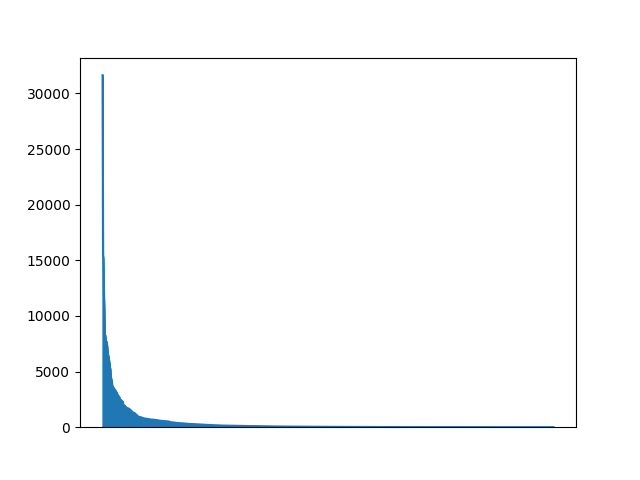

Fiction                    31638
Romance                    15495
Fantasy                    15046
Young Adult                11869
Contemporary               10520
Nonfiction                  8251
Adult                       8246
Novels                      7805
Mystery                     7702
Historical Fiction          7665
Audiobook                   7307
Classics                    6902
Adventure                   6452
Historical                  6383
Paranormal                  6030
Literature                  5836
Science Fiction             5374
Childrens                   5226
Thriller                    4587
Magic                       4248
Humor                       4227
History                     3685
Crime                       3675
Contemporary Romance        3624
Suspense                    3474
Urban Fantasy               3458
Middle Grade                3389
Chick Lit                   3358
Science Fiction Fantasy     3302
Supernatural                3196
Name: genr

In [40]:
print(f"There are {len(genres.drop_duplicates())} genres.")

plt.close()
ax = genres.value_counts().plot.area()
ax.get_xaxis().set_visible(False)
plt.show()

genres.value_counts().sort_values(ascending=False).head(30)

As we see, a similar pattern repeats.

## Authors
And again.

In [41]:
def to_list(string):
     return [x.strip() for x in string.split(",")]

authors = data["author"].map(to_list)  # the original column contains comma-separated strings. we want lists.
authors = authors.explode().dropna().astype("category")
authors

0                          Suzanne Collins
1                             J.K. Rowling
1              Mary GrandPré (Illustrator)
2                               Harper Lee
3                              Jane Austen
                       ...                
52475    Kim Richardson (Goodreads Author)
52476       Tom Pollack (Goodreads Author)
52476       John Loftus (Goodreads Author)
52476                            Jim Alves
52477      Misty Moncur (Goodreads Author)
Name: author, Length: 68704, dtype: category
Categories (34567, object): ['"Whoopie Pie" Pam Jarrell (Goodreads Author)', '#1-3)', '#4-5)', '(Goodreads Author)', ..., '高野苺', '麻枝 准', '黒星 紅白 (イラスト)', 'ﻳﻮﺳﻒ ﺣﻼﻕ (Translator)']

There are 34567 authors.


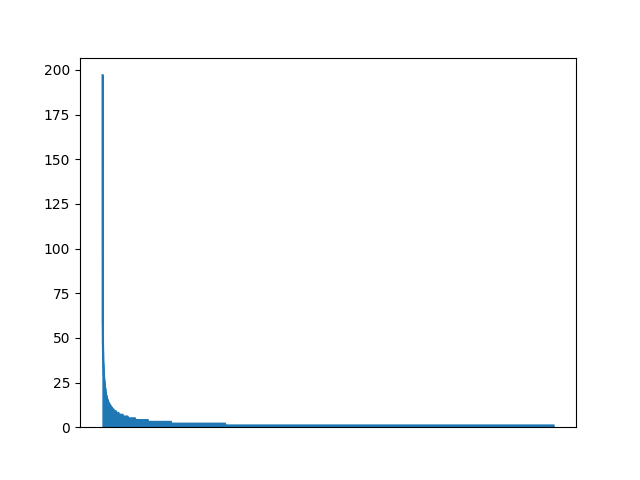

more…                                 197
Stephen King (Goodreads Author)       104
Nora Roberts (Goodreads Author)       103
James Patterson (Goodreads Author)     99
Agatha Christie                        88
Anonymous                              79
Erin Hunter                            74
Terry Pratchett                        67
Meg Cabot (Goodreads Author)           65
Mercedes Lackey                        62
J.D. Robb (Goodreads Author)           59
Carolyn Keene                          59
Karen Kingsbury (Goodreads Author)     57
Cassandra Clare (Goodreads Author)     55
Alex Archer (pseudonym)                54
Dean Koontz (Goodreads Author)         54
Arthur Conan Doyle                     53
Bella Forrest (Goodreads Author)       53
Neil Gaiman (Goodreads Author)         53
Lucian Bane (Goodreads Author)         52
Enid Blyton                            51
Anne McCaffrey                         50
Will Durant                            49
NOT A BOOK                        

In [42]:
print(f"There are {len(authors.drop_duplicates())} authors.")

plt.close()
ax = authors.value_counts().plot.area()
ax.get_xaxis().set_visible(False)
plt.show()

authors.value_counts().sort_values(ascending=False).head(30)

The fall is less severe this time. The tail seems heavier. 
We can also see that this column also needs some cleaning. (`more… `, `NOT A BOOK`...)

---

Let's try analyzing an author's effect on the book's rating ?

In [43]:
def author_to_list(row):
    ret = row.copy()
    ret[0] = [x.strip() for x in row[0].split(",")]
    return ret

author_rating = data[["author", "rating"]].apply(author_to_list, axis=1).explode("author")
author_rating["author"].astype("category")
author_rating

,author,rating
0,Suzanne Collins,4.33
1,J.K. Rowling,4.50
1,Mary GrandPré (Illustrator),4.50
2,Harper Lee,4.28
3,Jane Austen,4.26
...,...,...
52475,Kim Richardson (Goodreads Author),3.70
52476,Tom Pollack (Goodreads Author),3.85
52476,John Loftus (Goodreads Author),3.85
52476,Jim Alves,3.85


In [44]:
author_rating["author"].corr(author_rating["rating"], method="spearman")

0.0036154946819619087

In [45]:
print(author_rating["rating"].mean())
print(author_rating["rating"].median())
print(author_rating["rating"].std())

4.030793985794132
4.04
0.35977974144403296


In [46]:
author_rating.loc[author_rating["rating"] < 3]

,author,rating
3938,Mary Williams (Goodreads Author),2.88
5752,Victoria Foyt (Goodreads Author),1.99
7574,Chuck Palahniuk (Goodreads Author),2.97
8321,M.R. Desmond (Goodreads Author),0.00
9100,Gregory Maguire,2.82
...,...,...
51834,Thomas Keymer (Editor),2.79
51834,Alice Wakely (Editor),2.79
51962,Nicholas Davies,2.60
52235,ناهید طباطبایی,2.88


We see that basically all books are very well rated, and that the author is not really correlated to the rating.

## Languages
It may be interesting to know how many languages are represented and how frequently, if we want to do simple similarity analysis on the book descriptions (which we do).

In [24]:
languages = data["language"]
languages = languages.dropna().astype("category")
languages

0        English
1        English
2        English
3        English
4        English
          ...   
52473    English
52474    English
52475    English
52476    English
52477    English
Name: language, Length: 48672, dtype: category
Categories (81, object): ['Afrikaans', 'Albanian', 'Aleut', 'Amharic', ..., 'Ukrainian', 'Undetermined', 'Urdu', 'Vietnamese']

There are 81 languages.


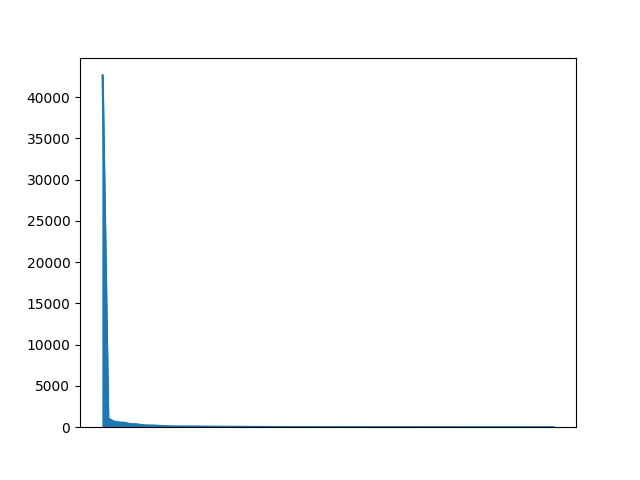

English                  42661
Arabic                    1038
Spanish                    687
French                     579
German                     528
Indonesian                 371
Portuguese                 363
Italian                    255
Dutch                      215
Turkish                    211
Persian                    164
Polish                     138
Greek, Modern (1453-)      112
Russian                     98
Swedish                     94
Japanese                    94
Romanian                    93
Bengali                     84
Malay                       74
Bulgarian                   70
Danish                      63
Urdu                        60
Finnish                     56
Czech                       55
Filipino; Pilipino          54
Lithuanian                  46
Serbian                     36
Norwegian                   36
Tamil                       31
Estonian                    26
Name: language, dtype: int64

In [25]:
print(f"There are {len(languages.drop_duplicates())} languages.")

plt.close()
ax = languages.value_counts().plot.area()
ax.get_xaxis().set_visible(False)
plt.show()

languages.value_counts().sort_values(ascending=False).head(30)

As we can see, English is vastly more represented in this dataset.

As such, we think about allowing ourselves to throw away books in every other language, since we'd be unable to easily analyze their descriptions for meaningful similarity to other books'.